# Import section

In [1]:
from sys import exit
from stage2 import *

import numpy as np
from astropy.io.votable import parse
from astropy.table import Table
import matplotlib.lines as mlines
from matplotlib.cm import get_cmap

# Checking axial ratio between Cassata and Zurich

## Opening file and checking file type

In [51]:
pathdata = "outputs/"
data     = ["matching_fieldGals_Cassata_and_Zurich_corrected_radius_v2.vot"]

for name in data:
    voTag = is_VOtable(pathdata+name)
    if voTag:        
        fullFileName = pathdata + name
        #Retrieving the data
        table = parse(fullFileName)
        full  = table.get_first_table()
        
        print("Size of", name, "is", full.array.shape[0], "\n")
    else:
        exit("Exiting")

The file outputs/matching_fieldGals_Cassata_and_Zurich_corrected_radius_v2.vot is a VOtable, right ? True
Size of matching_fieldGals_Cassata_and_Zurich_corrected_radius_v2.vot is 261 



## Getting data

In [52]:
catalog = parse(pathdata+data[0]).get_first_table().array
fields  = np.asarray(catalog.dtype.names)

#Converting to an astropy table for simplicity
table = Table(catalog)

## Getting wanted fields

In [53]:
b_a_Cassata = table['Axial_Ratio_CASSATA']
a_b_Zurich  = table['ACS_ELONGATION_ZURICH']
size        = table['Corrected_radius'] #*0.03 #in arcsec

b_a_Cass2   = table['Axial_Ratio_CASSATA']
ell_Zurich  = table['ELL_GIM2D_ZURICH']
le_Zurich   = table['LE_ELL_GIM2D_ZURICH']
ue_Zurich   = table['UE_ELL_GIM2D_ZURICH']
size2       = table['Corrected_radius'] #*0.03

# Removing gals without Zurich info
m = np.where(a_b_Zurich != -9999)
b_a_Cassata, a_b_Zurich, size = applyMask([b_a_Cassata, a_b_Zurich, size], m)

print("There are", np.shape(b_a_Cassata)[0], "galaxies for this comparison.")

# Removing gals without GIM2D info
m = maskToRemoveVal([ell_Zurich, le_Zurich, ue_Zurich])
m = np.logical_and(m, maskToRemoveVal([ell_Zurich, le_Zurich, ue_Zurich], val=-9999, keep=False))
ell_Zurich, le_Zurich, ue_Zurich, b_a_Cass2, size2 = applyMask([ell_Zurich, le_Zurich, ue_Zurich, b_a_Cass2, size2], m)

print("There are", np.shape(b_a_Cass2)[0], "galaxies for this analysis.")

There are 176 galaxies for this comparison.
There are 57 galaxies for this analysis.


__Infos__:

- 261 field galaxies with corrected radius
- 176 after removing those without Zurich's SExtractor b/a
- 57 after removing those without GIM2D b/a

Hence 67\% have two measurements and 22\% have three measurements of b/a.

## Plotting

File Plots/checkMorpho/check_b_a.pdf already exists but overwritting was disabled. Thus exiting without writing.
0.09675053054462004


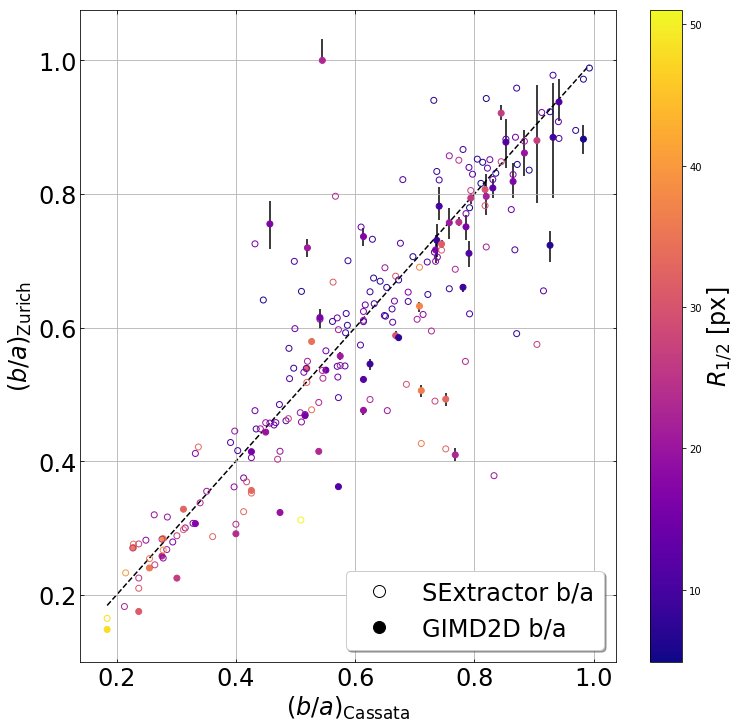

In [56]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

b_a_Zurich = 1.0/a_b_Zurich
b_a_GIM2D  = 1.0-ell_Zurich
le_baGIM2D = np.abs(le_Zurich)*b_a_GIM2D*b_a_GIM2D
ue_baGIM2D = np.abs(ue_Zurich)*b_a_GIM2D*b_a_GIM2D

errors = [le_baGIM2D, ue_baGIM2D]
plt.errorbar(b_a_Cass2, b_a_GIM2D, yerr=errors, color='k', linestyle='None', zorder=1)

Sextractor = mlines.Line2D([], [], color='black', marker='o', markersize=12, fillstyle='none', label=r'SExtractor b/a', linestyle='None')
GIM2D      = mlines.Line2D([], [], color='black', marker='o', markersize=12, label='GIMD2D b/a', linestyle='None')
plt.legend(handles=[Sextractor, GIM2D], loc='best', prop={'size': 24}, shadow=True, fancybox=True)

line = [np.min(b_a_Cassata), np.max(b_a_Cassata)]
asManyPlots(111, [b_a_Cassata, b_a_Cass2, line], [b_a_Zurich, b_a_GIM2D, line], 
            marker=["o", "o", "None"],
            unfilledFlag=[True, False, False],
            zorder=[3, 2, 0],
            color=[size, size2, 'k'],
            plotFlag=[False, False, True],
            linestyle=['None', 'None', "--"],
            cmap='plasma',
            showColorbar=True,
            colorbarLabel=r'$R_{1/2} \,\, [\rm{px}]$',
            colorbarTicksLabelsSize=36,
            ylabel=r"$(b/a)_{\rm{Zurich}}$", xlabel=r"$(b/a)_{\rm{Cassata}}$",
            outputName='Plots/checkMorpho/check_b_a.pdf', overwrite=False)

print(np.std(b_a_Zurich-b_a_Cassata))

# Comparing Cassata's b/a with that of GalFit

## Opening file and checking file type

In [26]:
pathdata = "outputs/"
data     = ["matching_clusterGals_with_Cassata_acc_1_arcsec.vot"]

for name in data:
    voTag = is_VOtable(pathdata+name)
    if voTag:        
        fullFileName = pathdata + name
        #Retrieving the data
        table = parse(fullFileName)
        full  = table.get_first_table()
        
        print("Size of", name, "is", full.array.shape[0], "\n")
    else:
        exit("Exiting")

The file outputs/matching_clusterGals_with_Cassata_acc_1_arcsec.vot is a VOtable, right ? True


Size of matching_clusterGals_with_Cassata_acc_1_arcsec.vot is 356 



## Getting data

In [33]:
catalog = parse(pathdata+data[0]).get_first_table().array
fields  = np.asarray(catalog.dtype.names)

#Converting to an astropy table for simplicity
table = Table(catalog)

## Getting wanted fields

In [42]:
b_a_Cassata = table['Axial_Ratio']
b_a_GF      = table['b_a_d_GF']
db_a_GF     = table['db_a_d_GF']
mag_d_GF    = table['Mag_d_GF']
mag_b_GF    = table['Mag_b_GF']

# Removing gals without Zurich info
m = np.where(np.logical_and(b_a_GF != -999, db_a_GF<1))
b_a_Cassata, b_a_GF, db_a_GF, mag_d_GF, mag_b_GF = applyMask([b_a_Cassata, b_a_GF, db_a_GF, mag_d_GF, mag_b_GF], m)

## Plotting

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8d61b80400>,
 [<matplotlib.lines.Line2D at 0x7f8d61b80e48>])

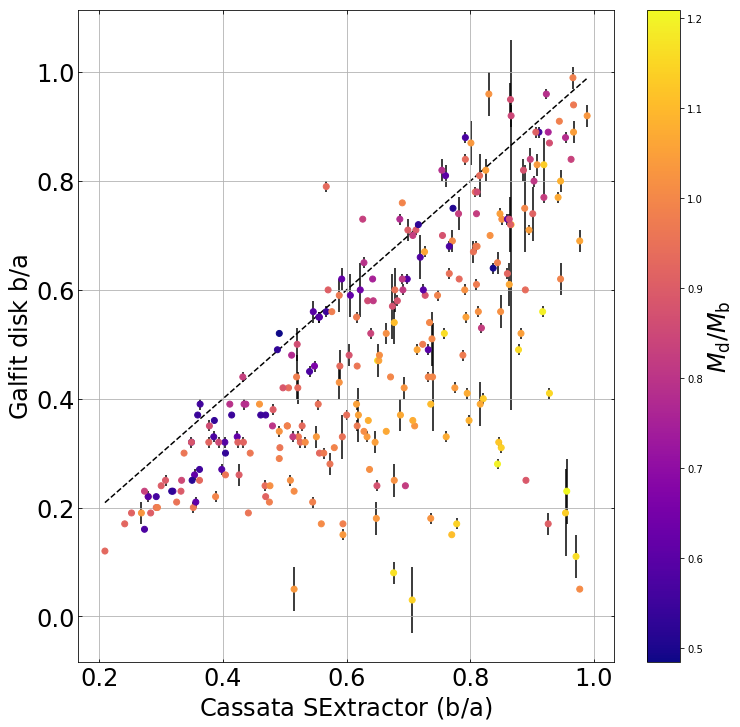

In [48]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

color  = mag_d_GF/mag_b_GF
errors = db_a_GF
plt.errorbar(b_a_Cassata, b_a_GF, yerr=errors, color='k', linestyle='None', zorder=1)

line = [np.min(b_a_Cassata), np.max(b_a_Cassata)]
asManyPlots(111, [b_a_Cassata, line], [b_a_GF, line], 
            marker=["o", "None"],
            zorder=[2, 0],
            color=[color, 'k'],
            plotFlag=[False, True],
            linestyle=['None', "--"],
            showColorbar=True,
            colorbarLabel=r"$M_{\rm{d}} / M_{\rm{b}}$",
            cmap='plasma',
            ylabel=r"$\rm{Galfit \,\, disk \,\, b/a}$", xlabel=r"$\rm{Cassata \,\, SExtractor \,\, (b/a)}$",
            outputName='Plots/checkMorpho/check_b_a_GF.pdf', overwrite=True)

# Plotting how the error on the inclination evolves with b/a

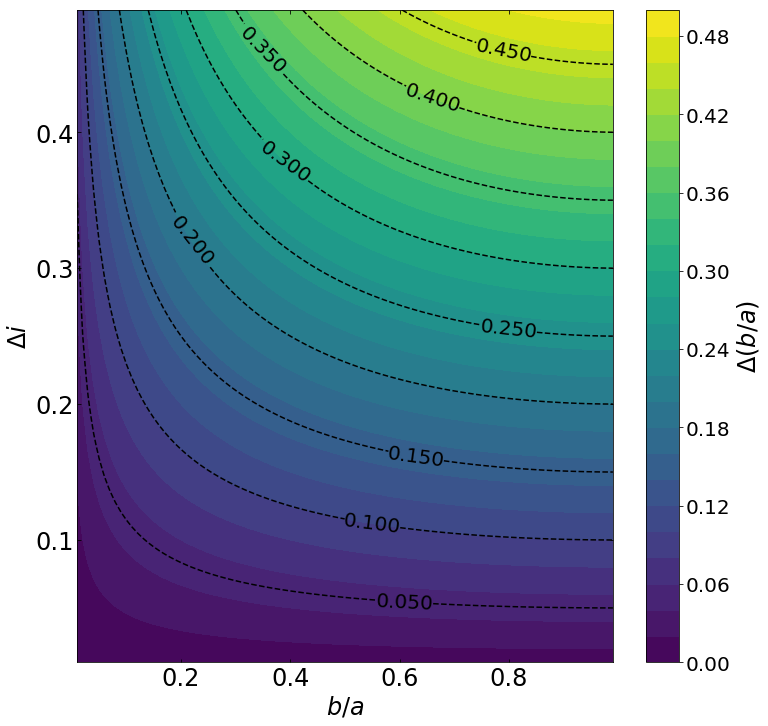

In [90]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

ax1 = plt.subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(which='both', direction='in', labelsize=24)

def errorb_a(b_a, delta):
    return delta*np.sqrt(np.abs(b_a*(2-b_a)))

numbers = np.arange(0.01, 1, 0.01)
lis     = np.arange(0.01, 0.5, 0.01)

X, Y = np.meshgrid(numbers, lis)
Z    = errorb_a(X, Y)

tmp = ax1.contourf(X, Y, Z, 30, cmap='viridis')
tm  = ax1.contour(X, Y, Z, 10, colors='k', linestyles="--")
tm.clabel(fontsize=20)

plt.xlabel(r'$b/a$', size=24)
plt.ylabel(r'$\Delta i$', size=24)

col = plt.colorbar(tmp)
col.set_label(r'$\Delta (b/a)$', size=24)
col.ax.tick_params(labelsize=20) 

plt.savefig('Plots/Error_on_inc_versus_b_a.pdf', bbox_inches='tight')